In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
df = pd.read_csv('iris.csv',header = None)
dataset = df.values
data = dataset[:, 0:4]
target = dataset[:, 4]

In [3]:
df[4] = pd.Categorical(df[4])
df[4] = df[4].cat.codes
target = df.values[:, 4]

In [4]:
'''data.mean(), data.std()'''
mean = (sum(sum(data)))/(len(data)*len(data[0]))
std = math.sqrt(sum(list(sum((k-mean)**2 for k in data)))/(len(data)*len(data[0])))
maximum = max(max(k) for k in data)
minimum = min(min(k) for k in data)

In [5]:
new_max = 1
new_min = 0
data_dash = list(list(((k - minimum) * (new_max - new_min))/(maximum - minimum)) for k in data)

In [6]:
def dist(A,B):
    sum = 0
    for i in range(0,len(A)):
        sum += (A[i]-B[i])**2
    return math.sqrt(sum)

In [7]:
matrix = np.zeros((len(data_dash),len(data_dash)))
for i in range(0,len(data_dash)):
    for j in range(0,len(data_dash)):
        if i==j:
            continue
        else:
            matrix[i][j] = dist(data_dash[i],data_dash[j])

In [8]:
cluster = []
for i in range(0,len(data_dash)):
    avg = np.mean(matrix[i])
    lst = []
    for j in range(0,len(data_dash)):
        if(avg <= matrix[i][j]):
            lst.append(j)
    cluster.append(lst)

In [9]:
cluster.sort(key=len, reverse = True)
try:
    for i in range(len(cluster)):
        for j in range(i+1,len(cluster)):
            if j >= len(cluster):
                break
            elif(set(cluster[j]).issubset(cluster[i])):
                del cluster[j]
except IndexError:
    print(j," ",len(cluster))

In [10]:
while(len(cluster) != 3):
    p = np.zeros((len(cluster),len(cluster)))
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if i==j:
                continue
            else:
                intersection = set(cluster[i]).intersection(set(cluster[j]))
                union = set(cluster[i]).union(set(cluster[j]))
                p[i][j] = len(intersection)/len(union)
    max = -1
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if max <= p[i][j]:
                max = p[i][j]
                row = i
                col = j
    cluster[row] = set(cluster[row]).union(set(cluster[col]))
    del cluster[col]

In [11]:
len(cluster)

3

In [12]:
[len(k) for k in cluster]

[94, 59, 107]

In [13]:
'''cluster = np.ndarray(cluster)
for i in range(len(cluster)):
    cluster[i] = np.ndarray(cluster[i])'''

'cluster = np.ndarray(cluster)\nfor i in range(len(cluster)):\n    cluster[i] = np.ndarray(cluster[i])'

In [14]:
type(cluster[0])

set

In [15]:
cluster_1 = list(cluster[0])
cluster_2 = list(cluster[1])
cluster_3 = list(cluster[2])

In [16]:

lst_1 = [] 
lst_2 = []
lst_3 = []
target = np.zeros((150,3))
for i in cluster_1:
    lst_1.append([data[i],i])
    target[i][0] = 1
for i in cluster_2:
    lst_2.append([data[i],i])
    target[i][1] = 2
for i in cluster_3:
    lst_3.append([data[i],i])
    target[i][2] = 3

lst_1 = np.array(lst_1)
lst_2 = np.array(lst_2)
lst_3 = np.array(lst_3)

In [17]:
l = []
m = []

for i in range(len(lst_1)):
    l.append([lst_1[i][0][0],lst_1[i][1]])
    m.append([lst_1[i][0][1],lst_1[i][1]])

for i in range(len(lst_2)):
    l.append([lst_2[i][0][0],lst_2[i][1]])
    m.append([lst_2[i][0][1],lst_2[i][1]])
    
for i in range(len(lst_1)):
    l.append([lst_3[i][0][0],lst_3[i][1]])
    m.append([lst_3[i][0][1],lst_3[i][1]])
    
f1 = []
i1 = []
f2 = []
i2 = []

for i in range(len(l)):
    f1.append(l[i][0])
    i1.append(l[i][1])
    
for i in range(len(m)):
    f2.append(m[i][0])
    i2.append(m[i][1])
    

f1 = np.array(f1)
f2 = np.array(f2)

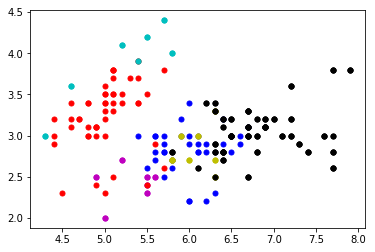

In [18]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color = -1
for i in range(len(f1)):
        if target[i1[i]][0] == 1 and target[i1[i]][1] == 2 and target[i1[i]][2] == 3:
            color = colors[6]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 2 and target[i1[i]][2] == 0:
            color = colors[5]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 0 and target[i1[i]][2] == 3:
            color = colors[4]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 2 and target[i1[i]][2] == 3:
            color = colors[3]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 0 and target[i1[i]][2] == 3:
            color = colors[2]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 2 and target[i1[i]][2] == 0:
            color = colors[1]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 0 and target[i1[i]][2] == 0:
            color = colors[0]
            
        plt.plot(f1[i],f2[i],color,marker = 'o',markersize = 5)

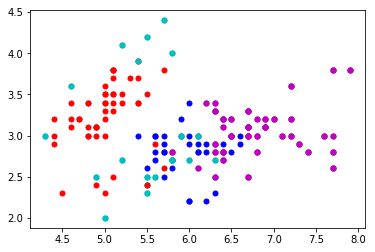

In [19]:
colors = ['b', 'g', 'r', 'c', 'm']
color = -1
for i in range(len(f1)):
        if target[i1[i]][0] == 1 and target[i1[i]][1] == 2 and target[i1[i]][2] == 3:
            color = colors[4]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 2 and target[i1[i]][2] == 0:
            color = colors[3]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 0 and target[i1[i]][2] == 3:
            color = colors[3]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 2 and target[i1[i]][2] == 3:
            color = colors[3]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 0 and target[i1[i]][2] == 3:
            color = colors[2]
        elif target[i1[i]][0] == 0 and target[i1[i]][1] == 2 and target[i1[i]][2] == 0:
            color = colors[1]
        elif target[i1[i]][0] == 1 and target[i1[i]][1] == 0 and target[i1[i]][2] == 0:
            color = colors[0]
            
        plt.plot(f1[i],f2[i],color,marker = 'o',markersize = 5)

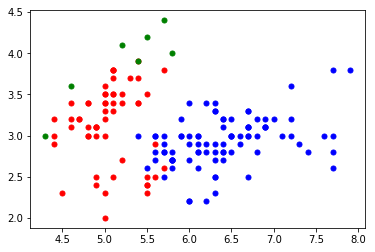

In [21]:
data_sum = [0,0,0,0]
for i in range(len(cluster_1)):
    for j in range(4):
        data_sum[j] += data[cluster_1[i]][j]
        
for i in range(4):
    data_sum[i] = data_sum[i]/150 
    
cluster_1_mean = data_sum

data_sum = [0,0,0,0]
for i in range(len(cluster_2)):
    for j in range(4):
        data_sum[j] += data[cluster_2[i]][j]
        
for i in range(4):
    data_sum[i] = data_sum[i]/150 
    
cluster_2_mean = data_sum

data_sum = [0,0,0,0]
for i in range(len(cluster_3)):
    for j in range(4):
        data_sum[j] += data[cluster_3[i]][j]
        
for i in range(4):
    data_sum[i] = data_sum[i]/150 
    
cluster_3_mean = data_sum

mem_val  = np.ones((150,3))

for i in range(len(target)):
    d1 = 0
    d2 = 0
    d3 = 0
    p1 = 0
    p2 = 0
    p3 = 0
    if(target[i][0] == 1 and target[i][1] == 0 and target[i][2] == 0):
        mem_val[i][0] = 0 
    if(target[i][0] == 0 and target[i][1] == 2 and target[i][2] == 0):
        mem_val[i][1] = 0
    if(target[i][0] == 0 and target[i][1] == 0 and target[i][2] == 3):
        mem_val[i][2] = 0
    if(target[i][0] and target[i][1]):
        d1 = dist(data[i],cluster_1_mean)  
        d2 = dist(data[i],cluster_2_mean)
        p1 = d1/(d1+d2)
        p2 = d2/(d1+d2)
        if p1 >= p2:
            mem_val[i][0] = p2
        else:
            mem_val[i][0] = p1
    if(target[i][1] and target[i][2]):
        d2 = dist(data[i],cluster_2_mean)  
        d3 = dist(data[i],cluster_3_mean)
        p2 = d2/(d3+d2)
        p3 = d3/(d3+d2)
        if p2 >= p3:
            mem_val[i][1] = p3
        else:
            mem_val[i][1] = p2
    if(target[i][2] and target[i][0]):
        d1 = dist(data[i],cluster_1_mean)  
        d3 = dist(data[i],cluster_3_mean)
        p1 = d1/(d1+d3)
        p3 = d3/(d1+d3)
        if p1 >= p3:
            mem_val[i][2] = p3
        else:
            mem_val[i][2] = p1
    if(target[i][0] and target[i][1] and target[i][2]):
        d1 = dist(data[i],cluster_1_mean)  
        d2 = dist(data[i],cluster_2_mean)  
        d3 = dist(data[i],cluster_3_mean)
        p1 = d1/(d1+d2+d3)
        p2 = d2/(d1+d2+d3)
        p3 = d3/(d1+d2+d3)
        temp = min([p1,p2,p3])
        if temp == p1 and mem_val[i][0]>temp:
            mem_val[i][0] = temp;
        elif temp == p2 and mem_val[i][1]>temp:
            mem_val[i][1] = temp;
        elif temp == p2 and mem_val[i][2]>temp:
            mem_val[i][2] = temp;

ans = np.ones((150,3))
for i in range(len(mem_val)):
    temp = min(mem_val[i])
    if temp == mem_val[i][0]:
        ans[i][0] = temp
        ans[i][1] = 1
        ans[i][2] = 1
    elif temp == mem_val[i][1]:
        ans[i][0] = 1
        ans[i][1] = temp
        ans[i][2] = 1
    elif temp == mem_val[i][2]:
        ans[i][0] = 1
        ans[i][1] = 1
        ans[i][2] = temp
        
graph = np.zeros((150,3))
for i in range(len(ans)):
    for j in range(3):
        if(j==0):
            if(ans[i][j] == 1):
                graph[i][j] = -1
            else:
                graph[i][j] = 1
        elif(j==1):
            if(ans[i][j] == 1):
                graph[i][j] = -1
            else:
                graph[i][j] = 2
        elif(j==2):
            if(ans[i][j] == 1):
                graph[i][j] = -1
            else:
                graph[i][j] = 3


colors = ['b', 'g', 'r']
color = -1
for i in range(len(graph)):
        if graph[i][0] == 1:
            color = colors[0]
        elif graph[i][1] == 2:
            color = colors[1]
        elif graph[i][2] == 3:
            color = colors[2]
            
        plt.plot(data[i][0],data[i][1],color,marker = 'o',markersize = 5)
        
        